In [5]:
!sudo pip install autocorrect


    100% |################################| 3.6MB 153kB/s 
  Running setup.py bdist_wheel for autocorrect
  Stored in directory: /root/.cache/pip/wheels/72/d5/4d/8e8160e7f68c7899fb150d8dd666a9fa2a73fdf7a51dd2d756
Successfully built autocorrect
You are using pip version 7.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

%matplotlib inline

def tfidf_example():
    return pd.DataFrame({'Superman Wiki':
     {'Superman':'high','the':'medium','Apples':'low'},
 'Apple Wiki':
     {'Superman':'low','the':'medium','Apples':'high'}})



def highlight_words_in_text(text, words):
    random_id = np.random.choice(xrange(100000))
    textid = 'text{}'.format(random_id)
    words = [str(i.lemma_) for i in nlp(unicode(words))]
    spacy_text = nlp(unicode(text))

    text = spacy_text.text
    
    dynamic = ""
    
    for token in spacy_text:
        if token.lemma_ in words:
            start, stop = token.idx, token.idx + len(token)
            dynamic += """  var innerHTML = inputText.innerHTML;
                            \n innerHTML = innerHTML.substring(0,{} + adjuster) + "<span class='highlight'>" + innerHTML.substring({} + adjuster,{} + adjuster) + "</span>" + innerHTML.substring({} + adjuster); 
                            adjuster = adjuster + innerHTML.length - inputText.innerHTML.length
                            inputText.innerHTML = innerHTML;
                            """.format(*[start, start, stop, stop])
                

    div = "<div id='{}'>{}</div><br>".format(*[textid,text])


    css = "<style>.highlight{background-color:yellow;}</style>"
    
    javascript = """
    <script>

    inputText = document.getElementById('{}');
    var innerHTML = inputText.innerHTML;
    var adjuster = 0;
    {} 
    </script>
    """.format(*[textid, dynamic])


    html = '<html><body>{} {} {}</body>'.format(*[div, css, javascript])
    
    return html

        

def plot_vector_graph():
    from sklearn.feature_extraction.text import CountVectorizer
    documents = {
        'doc1' : 'Welcome to weekly book review',
        'doc2' : 'This isnt news, but the president discusses his favorite book',
        'query' : 'In the news today the president said'}
    doc_names = ['doc1','doc2','query']
    doc_texts = [documents[name] for name in doc_names]

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(doc_texts).todense()
    vocabulary = vectorizer.get_feature_names()

    idx = [vocabulary.index(i) for i in ['news','president','book']]
    X_subset = np.array([X[:, i] for i in idx]).reshape((3,3)).T


    class Arrow3D(FancyArrowPatch):
        def __init__(self, x, y, z, *args, **kwargs):
            FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
            self._verts3d = x, y, z

        def draw(self, renderer):
            xs3d, ys3d, zs3d = self._verts3d
            xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
            self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
            FancyArrowPatch.draw(self, renderer)


    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')

    defaults = {
        "mutation_scale":20,
        "lw":3,
        "arrowstyle":"->",
        "color":"red"}

    specials = {
        0:{'color':'blue'},
        1:{'color':'red'},
        2:{'color':'black'}}

    zeroes = np.zeros(3)
    artists = []
    for i in xrange(3):
        vector = X_subset[i]
        coordinates = zip(zeroes, vector)
        defaults.update(specials[i])

        arrow = Arrow3D(*coordinates, **defaults)
        ax.add_artist(arrow)
        artists.append(arrow)


    distance_coords = zip(X_subset[1], X_subset[2])
    defaults['alpha'] = .1
    defaults['color'] = 'red'
    defaults['linestyle'] = 'dashed'
    distance_arrow = Arrow3D(*distance_coords, **defaults)
    ax.add_artist(distance_arrow)
    artists.append(distance_arrow)
    
    
    distance_coords = zip(X_subset[0], X_subset[2])
    defaults['alpha'] = .1
    defaults['color'] = 'blue'
    defaults['linestyle'] = 'dashed'
    distance_arrow = Arrow3D(*distance_coords, **defaults)
    ax.add_artist(distance_arrow)
    artists.append(distance_arrow)    
    
    texts = [documents[i] for i in doc_names]
    texts.append("Distance between Doc 1 and Query")
    texts.append("Distance between Doc 2 and Query")

    ax.set_xlabel('news'), ax.set_ylabel('president'), ax.set_zlabel('books')
    ax.set_zticks([0, 1]), ax.set_xticks([0, 1]), ax.set_yticks([0, 1])  
    ax.legend(artists, texts)
    return ax
    #plt.show()

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import autocorrect

#create the processing function
def process(document):
    """
    Parameters
    ----------
    document: str
        The document we want to process
        
    Returns
    ----------
    
    """
    #create spacy object
    
    spacy_doc = nlp(unicode(document), parse=False, entity=False)
    
    #grab the lemma for each token in the document
    processed_tokens = map(lambda token: token.lemma_ if token.lemma_ != '-PRON-' else 'we', spacy_doc)
    
    #join lemmas to a string
    result = " ".join(processed_tokens)
    return result

#create a language model that uses the custom tokenizer
nlp = spacy.load('en')


In [5]:
#pass in the process function to sklearns vectorizer
toDTM = CountVectorizer(preprocessor=process)


documents = [
'Welcome to weekly book review',
'This isnt news, but the president discusses his favorite book',
'In the news today the president said'
]

DTM = toDTM.fit_transform(documents).todense()
words = toDTM.get_feature_names()

summary = pd.DataFrame(DTM, columns = words, index = documents)
summary


,be,book,but,discuss,favorite,his,in,news,not,president,review,say,the,this,to,today,weekly,welcome
Welcome to weekly book review,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
"This isnt news, but the president discusses his favorite book",1,1,1,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0
In the news today the president said,0,0,0,0,0,0,1,1,0,1,0,1,2,0,0,1,0,0


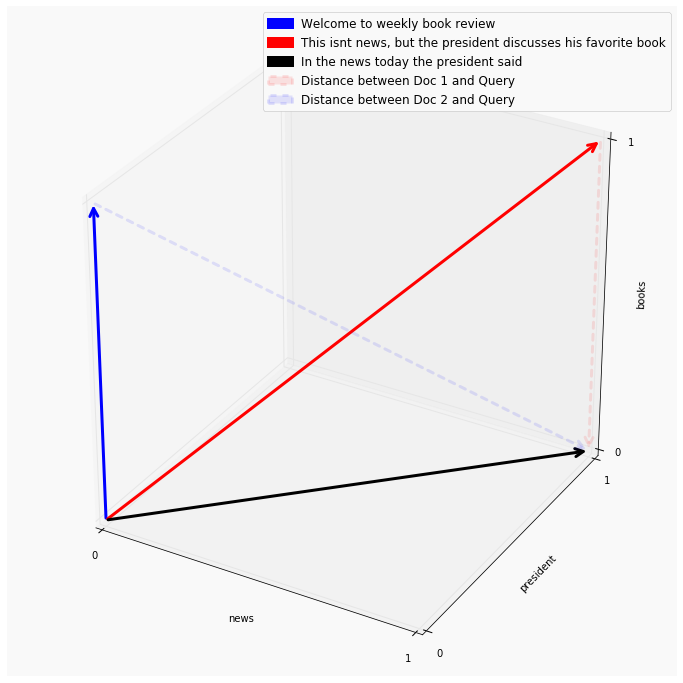

In [6]:
plot_vector_graph()

In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def getMostSimilarSentence(query, documents):
    """
    Transforms query into vector, and computes cosine similarity 
    of query vector against training documents.
    
    Parameters
    ----------
    query:                (string) document to compare
    vectorizer:            sklearn vectorizer class 
    document_term_matrix: (pandas.DataFrame) table of 
                          term instances in each document
                          
    Returns
    -------
    most similar document (string)
    """
    #create vectorizer and use it to build dtm
    vectorizer = CountVectorizer(preprocessor=process)
    dtm = vectorizer.fit_transform(documents).todense()
    
    #transform query to vector
    query_vector = encodeQuery(query, vectorizer)
    
    #compute similarities
    similarities = computeSimilarities(query_vector, dtm)
    
    #grab most similar document
    closest_idx = getMostSimilarIdx(similarities)
    return documents[closest_idx]

def encodeQuery(query, vectorizer):
    
    #transform query to vector
    query_vector = vectorizer.transform([query]).todense()
    return query_vector

def computeSimilarities(query_vector, dtm):
    
    #compute similarities
    all_vectors = np.concatenate((dtm, query_vector))
    similarities = cosine_similarity(all_vectors)[-1][:-1]
    return similarities

def getMostSimilarIdx(similarities):
    #grab most similar document
    return np.argmax(similarities)

In [48]:
from nltk.corpus import reuters

def get_document(fileid):
    return [" ".join(i) for i in reuters.sents(fileid)]

fileids = np.random.choice(reuters.fileids(), size=1000, replace=False)
raw_documents = map(get_document, fileids)

query = 'what are the sugar prices today'

In [ ]:
query_results = getMostSimilarSentence(query, raw_documents)

In [92]:
HTML(highlight_words_in_text(" ".join(query_results), query))

### TFIDF Vectors
$\text{tfidf}_t = \text{Term Frequency}_t \cdot \frac{1}{\text{Document Frequency}_t} =tf_t \cdot \frac{1}{log\frac{df_t}{N}}$

In [78]:
tfidf_example()

,Apple Wiki,Superman Wiki
Apples,high,low
Superman,low,high
the,medium,medium


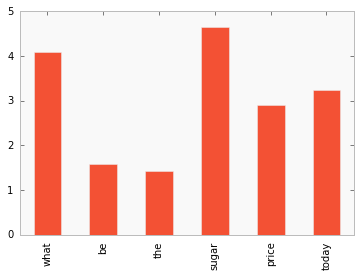

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor=process, stop_words=None)
dtm = vectorizer.fit_transform(raw_documents).todense()
vocabulary = vectorizer.get_feature_names()

#grab the idf values of words in the query
words_in_query = process(query).split(" ")
idx = [vocabulary.index(i) for i in words]
idf_values = [vectorizer.idf_[i] for i in idx]

#plot the idf values for each word
ax = pd.Series(idf_values, index = words).plot(kind = 'bar')
ax.grid()
plt.show()

In [52]:
#transform query to vector
query_vector = encodeQuery(query, vectorizer)

#compute similarities
similarities = computeSimilarities(query_vector, dtm)

#grab most similar document
closest_idx = getMostSimilarIdx(similarities)
closest_document = raw_documents[closest_idx]

In [93]:
HTML(highlight_words_in_text(" ".join(closest_document), query))